In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# **Optimisation**  
# **Projet Groupe 6**  
A bicyclette...
-----
*Augustin FERREY - Gaspard Pereira*


On s’intéresse dans ce sujet à un vélo à assistance électrique, dont on cherche à optimiser le pilotage.   
On suppose que l’on connaît la trajectoire à suivre, modélisée de façon monodimensionnelle (quitte à considérer l’abscisse curviligne de la trajectoire).  
On suppose que l’on souhaite partir d’une abscisse $x_0$ à vitesse nulle pour rejoindre une seconde abscisse $x_f$ en arrivant également à vitesse nulle.  
Pour cela, on considère un intervalle de temps $[0, T]$ que l’on découpe en N intervalles de temps de durée uniforme $∆t = T /N$.   
On note $x_i$ et $v_i$ les positions et vitesses au temps $t_i = i∆t$, reliées par $x_{i+1} = x_i + ∆tv_i$
  
    
La dynamique du vélo s’écrit 
$$
v_{i+1} = v_i + ∆t(α_1 − α_2v_i + α_3I_i + α_4T_i − gγ(x_i))
$$
où $\alpha_1$ et $\alpha_2$, $\alpha_3$, $\alpha_4$  $> 0$ sont des constantes données, $I$ est l’intensité parcourant le moteur électrique, $T_i$ est le couple fourni par le cycliste au pédalier, $g$ la constante gravitationnelle et $γ(x_i)$ la pente de la route à la position $x_i$.

Le vélo avance, cad que sa vitesse est positive : $v_i ≥ 0, i = 0, . . . , N$. Par ailleurs, les performances du moteur sont limitées. D’un part, l’intensité est bornée $0 ≤ I_i ≤ I_M (3)$
et d’autre part la charge de la batterie l’est également
$$
(4) : \sum_{i=0}^{N} ∆tI_i ≤ Q_{bat}       
$$
On souhaite limiter le couple fourni par le cycliste et on cherche donc à minimiser la valeur
$$
\sum_{i=0}^{N} T_i^2
$$

## I - Etude du problème d'optimisation


*1. Commenter la contrainte (4) et son origine.*

Le moteur du vélo est limité par la "capacité" (charge totale $Q_{bat}$) de la batterie qu'il emporte. La relation $I = \frac{dq}{dt}$ donne au premier ordre $q_{fournie, i} = \Delta t * I_i$  
Le moteur ne pouvant pas consommer plus d'énergie que celle disponible dans la batterie, on obtient donc la contrainte $(4)$.  


*2. Interpréter les différents termes apparaissant dans (2), en notant qu’on a fait l’hypothèse que la pente de la route était faible. Comment varient a priori ces paramètres en fonction du cycliste ? Sa masse intervient-elle ?*

Le principe fondamental de la dynamique s'écrivant $m* \frac{v_{i+1} - v_i}{\Delta t} = \sum F_i$, a priori tous les coefficients $\alpha_i$ dépendent de la masse du cycliste (inversement proportionnels à $m$).

- $\alpha_2$ est un coefficient de frottement (dépendant de la forme du vélo+cycliste, des pneus, de la route...)
- $\alpha_3$ comprend notamment le rendement du moteur
- $\alpha_4$ dépend des rayons du pédalier et des roues
- $gγ(x_i)$ est l'approximation de $g*cos(gγ(x_i))$ avec l'hypothèse $gγ(x_i) << 1$ (pente faible)


*3. Formuler le problème d’optimisation à résoudre sous la forme*
$min_z f(z)$   
*tel que* $c_{eq}(z) = 0$, $c_{in}(z) ≤ 0$. *On précisera les variables de décision z, leur nombre n, les contraintes $c_{eq}$ et $c_{in}$ ainsi que la fonction objectif f à minimiser.*  
  
  

On cherche à minimiser la valeur $\sum_{i=0}^{N} T_i^2$

On note $z = (T_0, T_1, ..., T_N)$ les variables de décision.  
Il y en a $n = N+1$.  
On note $f(z) = \sum_{i=0}^{N} T_i^2$ la fonction objectif à minimiser.

Les contraintes d'égalité viennent de l'équation de la dynamique du vélo, soit $c_{eq}(z) = (v_{i+1} - v_i - \Delta t(α_1 − α_2v_i + α_3I_i + α_4T_i − gγ(x_i)))_{i\in \llbracket 0 ; N-1 \rrbracket} $

Les contraintes d'inégalité sont les bornes sur l'intensité $I_i$ et la contrainte sur la batterie $\sum_{i=0}^{N} ∆tI_i ≤ Q_{bat}$,  
Soit :  
$c_{in}(z) = \left( (I_i - I_M)_{i=0, ..., N} , \sum_{i=0}^{N} ∆tI_i - Q_{bat} \right) \in \mathbb{R}^{N+2} $


*4. Etudier la convexité de ce problème*

La fonction objectif est convexe car c'est une somme de carrés.
L'espace d'étude, $\mathbb{R}^{N+1}$ est convexe..


## II - Identification du modèle dynamique  
  
Avant de pouvoir aborder le problème principale d’optimisation, on cherche à identifier les paramètres
régissant la dynamique du vélo, qui dépendent fortement de l’utilisateur. Pour ce faire, on dispose de données
numériques de la vitesse $v$, l’intensité $I$ et du couple du cycliste au niveau du pédalier $T$, enregistrés pendant
un essai, *effectué sur terrain plat*.

*5. Formuler le problème de moindres carrés correspondant à l’identification des coefficients $\alpha_1$, $\alpha_2$, $\alpha_3$ et $\alpha_4$ dans (2).*

On cherche à minimiser les écarts au carré entre les valeurs $v_{i+1}$ fournies et le 2d membre de (2).  

On note $x = (\alpha_1, \alpha_2, \alpha_3, \alpha_4)$ les paramètres à identifier.  
On note $b = (v_{i+1} - v_i)_{i=0, ..., N-1}$ les valeurs à approcher.  

On note $A = \Delta t \times \begin{pmatrix} 1 & -v_i & I_i & T_i \end{pmatrix}_{i=0, ..., N-1} \in \mathcal{M}_{N,4} (\mathbb{R})$ 

On cherche alors à minimiser $\|Ax - b\|^2$

*6. Charger les données à l’aide du fichier data_velo.csv et résoudre ce problème (on pourra utiliser la solution des moindres carrés, ou utiliser la fonction numpy.linalg.lstsq). On n’oubliera pas de filtrer convenablement le bruit de mesure des données, si besoin, et de commenter l’impact de ce filtrage et les résultats obtenus. On tracera en particulier l’évolution de la vitesse au cours du temps, ainsi que de la vitesse estimée obtenue à partir des mesures et des paramètres estimés $\alpha_i$.*

        Unnamed: 0     Time [s]  Vitesse [m/s]  Couple pédale [Nm]  \
count  3251.000000  3251.000000    3251.000000         3251.000000   
mean   1625.000000    16.250000       4.010428           14.981075   
std     938.627189     9.386272       2.645937           11.019039   
min       0.000000     0.000000       0.885017            0.000000   
25%     812.500000     8.125000       1.618129            6.009420   
50%    1625.000000    16.250000       3.367853           11.535321   
75%    2437.500000    24.375000       6.213960           22.103609   
max    3250.000000    32.500000       8.852142           46.970170   

             I [A]  
count  3251.000000  
mean     13.100882  
std       6.701816  
min       0.000000  
25%       6.158483  
50%      15.713445  
75%      18.266470  
max      24.377117  

 
 Paramètres estimés : 
 alpha1 =  -0.29425585698648404 
 alpha2 =  0.021428571428571307 
 alpha3 =  0.028571428571428678 
 alpha4 =  0.014285714285714304


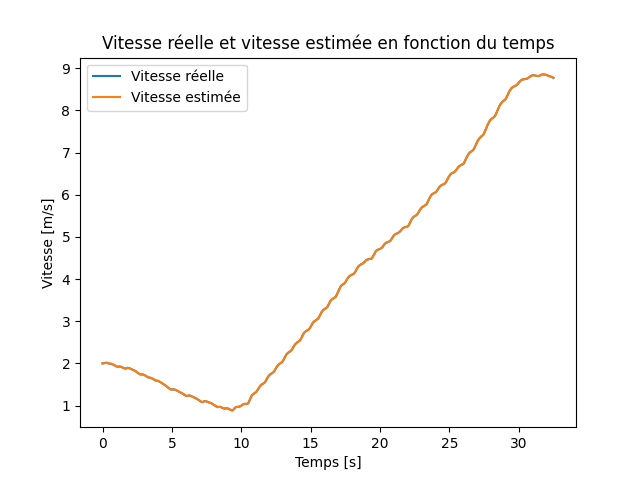

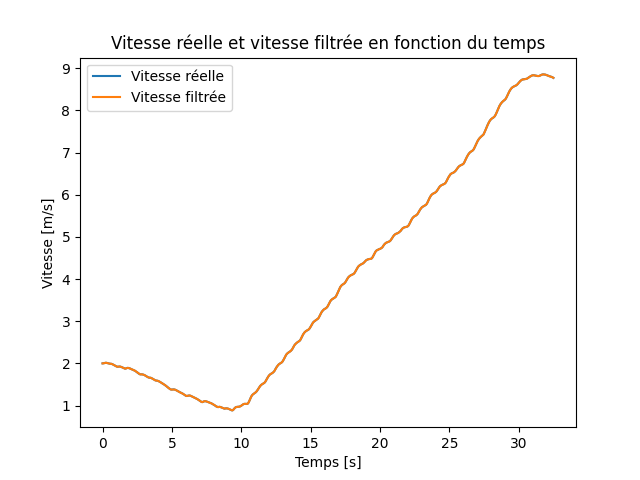

In [8]:
#%%
#importation des données de data_velo.csv
data = pd.read_csv("data_velo.csv")

#affichage des 5 premières lignes et des caractéristiques des données
# print(data.head())
print(data.describe()) #on vérifie que toutes les valeurs sont bien renseignées

#extraction des valeurs de vitesse, intensité, couple pédale, intervalle de temps
vitesse = data["Vitesse [m/s]"]
temps = data["Time [s]"]
I = data["I [A]"]
T = data["Couple pédale [Nm]"]

#intervalle de temps : dernier temps divisé par le nombre de valeurs de vitesse
DeltaT = data["Time [s]"][len(data)-1]/(len(vitesse)-1)

#initialisation de x
x0=[1,1,1,1]

#création du vecteur b et de la matrice A
b = np.array([vitesse[i+1]-vitesse[i] for i in range(len(vitesse)-1)])
A = DeltaT * np.array([[1, -vitesse[i], I[i], T[i]] for i in range(len(vitesse)-1)])


#Minimisation de norm(Ax-b)^2 avec np.linalg.lstsq
sol = np.linalg.lstsq(A,b,rcond=None)
x = sol[0]

alpha1,alpha2,alpha3,alpha4 = x
print("\n \n Paramètres estimés : \n alpha1 = ",alpha1, "\n alpha2 = ",alpha2, "\n alpha3 = ",alpha3, "\n alpha4 = ",alpha4)

#Calcul de la vitesse obtenue avec les paramètres estimés
vitesse_estimee = [vitesse[0]]
for i in range(len(vitesse)-1):
    vitesse_estimee.append(vitesse_estimee[i] + DeltaT*(alpha1 - alpha2*vitesse_estimee[i] + alpha3*I[i] + alpha4*T[i]))

plt.figure()
plt.title("Vitesse réelle et vitesse estimée en fonction du temps")
plt.xlabel("Temps [s]")
plt.ylabel("Vitesse [m/s]")
plt.plot(temps,vitesse,label="Vitesse réelle")
plt.plot(temps,vitesse_estimee,label="Vitesse estimée")
plt.legend()
plt.show()

#filtrage des valeurs de vitesse estimée
vitesse_filtree = [vitesse_estimee[0]]
for i in range(1,len(vitesse_estimee)-1):
    vitesse_filtree.append((vitesse_estimee[i-1]+vitesse_estimee[i]+vitesse_estimee[i+1])/3)

plt.figure()
plt.title("Vitesse réelle et vitesse filtrée en fonction du temps")
plt.xlabel("Temps [s]")
plt.ylabel("Vitesse [m/s]")
plt.plot(temps,vitesse,label="Vitesse réelle")
plt.plot(temps[:-1],vitesse_filtree,label="Vitesse filtrée")
plt.legend()
plt.show()



La vitesse estimée est indistinguible de la vitesse mesurée, et après filtrage elle en est toujours extrêmement proche.

*7. a)*  
  
Le calcul avec les nouvelles matrices par blocs donne $ A_{k+1}^T A_{k+1} = A_k^T A_k + a_{k+1} a_{k+1}^T $

L'application de la formule de Sherman-Morrison-Woodbury avec $p=1$ et $U=V=a_{k+1}$ donne 
$$ (A_{k+1}^T A_{k+1})^{-1} = (A_k^T A_k)^{-1} - (A_k^T A_k)^{-1} a_{k+1} \left( 1 + a_{k+1}^T (A_k^T A_k)^{-1} a_{k+1} \right)^{-1} a_{k+1}^T (A_k^T A_k)^{-1} $$  
  
Soit :
$$ (A_{k+1}^T A_{k+1})^{-1} = (A_k^T A_k)^{-1} - \frac{(A_k^T A_k)^{-1} a_{k+1} a_{k+1}^T (A_k^T A_k)^{-1}}{1 + a_{k+1}^T (A_k^T A_k)^{-1} a_{k+1}} $$
  
Ou encore :
$$ (A_{k+1}^T A_{k+1})^{-1} = (A_k^T A_k)^{-1} - K_k a_{k+1}^T (A_k^T A_k)^{-1} $$
avec $K_k = \gamma_k (A_k^T A_k)^{-1} a_{k+1}$ et $\gamma_k = \frac{1}{1 + a_{k+1}^T (A_k^T A_k)^{-1} a_{k+1}}$